# Base Model from MIT-BIH

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
model = keras.models.load_model(r"C:\Users\bono2\Desktop\Pitching Airfoil\models\model1.h5")

## TEST DATA

In [12]:
test_X = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\full\test_X.npy")
test_Y = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\full\test_Y.npy")
mean = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\full\mean.npy")

1/1 [==============================] - 0s 47ms/step


array([[1.9987322e-06, 3.5002258e-13, 8.0219604e-13, 2.2616319e-13,
        6.7514535e-03, 9.9324208e-01, 2.9812281e-06, 1.4274831e-06]],
      dtype=float32)

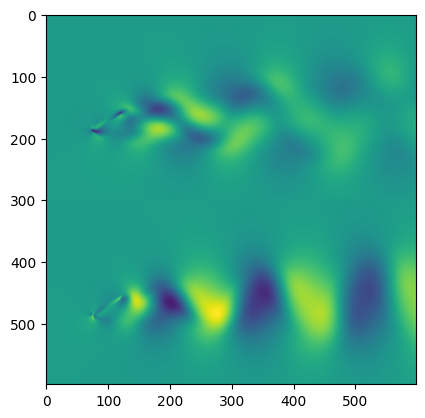

In [13]:
plt.imshow(test_X[0] - mean)
model.predict(np.zeros((1, 598,598,1)))

In [14]:
OHE = OneHotEncoder(sparse = False)
a = model.predict(np.array([test_X[0] - mean]))
np.argmax(a, axis = 1)

1/1 [==============================] - 0s 52ms/step


array([7], dtype=int64)

In [15]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(test_X - mean)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(OHE.fit_transform(test_Y), axis = 1)
# del test_X
# del test_Y

53/53 [==============================] - 4s 65ms/step


In [16]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       210
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       210
           5       1.00      1.00      1.00       210
           6       1.00      1.00      1.00       210
           7       1.00      1.00      1.00       210

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [17]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Test Accuracy = ", accuracy)

Test Accuracy =  1.0


Normalized confusion matrix


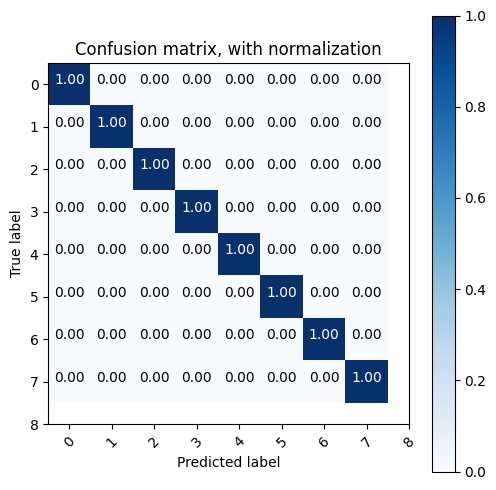

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

## VALIDATION DATA

In [25]:
val_X = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\full\val_X.npy")
val_Y = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\full\val_Y.npy")

In [26]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(val_X - mean)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(OHE.transform(val_Y), axis = 1)
del val_X
del val_Y

53/53 [==============================] - 4s 67ms/step


In [27]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       210
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       210
           5       1.00      1.00      1.00       210
           6       1.00      1.00      1.00       210
           7       1.00      1.00      1.00       210

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [28]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Validation Accuracy = ", accuracy)

Validation Accuracy =  1.0


Normalized confusion matrix


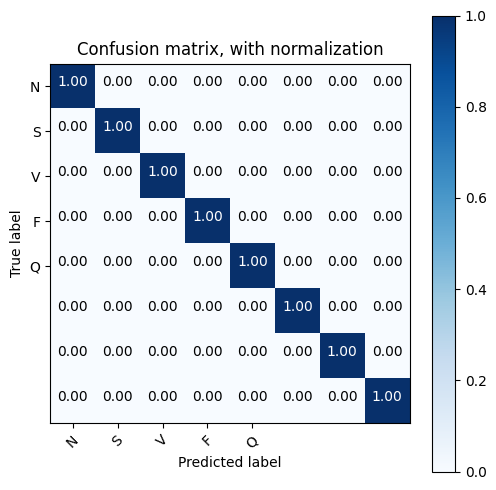

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

## TRAIN DATA

In [ ]:
train_X = np.load(r"C:\Users\user\Desktop\ECG_Project\MIT-BIH\mitbih_processed_image\train_image.npy", mmap_mode = 'r')
train_Y = np.load(r"C:\Users\user\Desktop\ECG_Project\MIT-BIH\mitbih_processed_image\train_label.npy")
prediction_list = []
for i in range(train_Y.shape[0]):
    question = np.array([train_X[i]])
    answer = np.argmax(model.predict(question))
    prediction_list.append(answer)

prediction = np.array(prediction_list)
actual = np.argmax(train_Y, axis = 1)

In [ ]:
print(classification_report(actual, prediction))

In [ ]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Train Accuracy = ", accuracy)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()